In [24]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import pandas as pd
import scipy.stats as ss

In [25]:
stoch = pd.read_csv("./data/fixed/res_stoch", sep=' ', names=['iters', 'score', 'time'])
# orig = pd.read_csv("./data/res_orig", sep=' ', names=['iters', 'score', 'time'])
fixed = pd.read_csv("./data/fixed/res_fixed", sep=' ', names=['iters', 'score', 'time'])
biased = pd.read_csv("./data/fixed/res_biased", sep=' ', names=['iters', 'score', 'time'])
reactive = pd.read_csv("./data/fixed/res_reactive", sep=' ', names=['iters', 'score', 'time'])
tsili = pd.read_csv("./data/fixed/res_tsili", sep=' ', names=['iters', 'score', 'time'])

In [26]:
all_dfs = [tsili, stoch, reactive, biased, fixed]
# all_dfs = [stoch, reactive, biased, fixed]
colors = ["black", "blue", "red", "green", "brown"]
# colors = ["blue", "red", "green", "brown"]
names = ["tsili", "random", "reactive", "biased", "fixed"]
# names = ["stoch", "reactive", "biased", "fixed"]

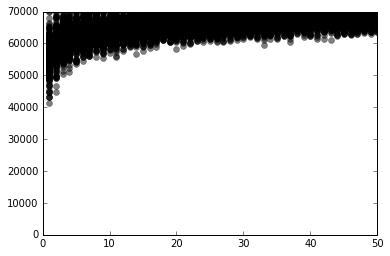

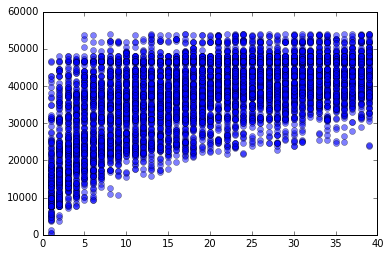

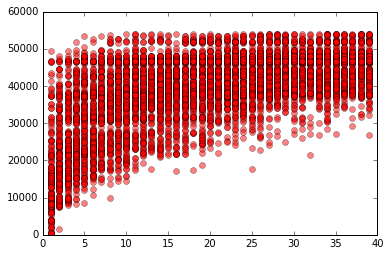

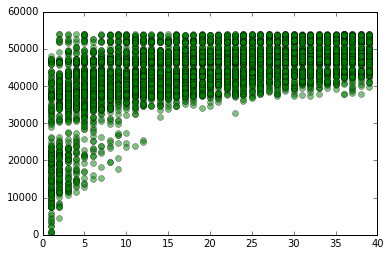

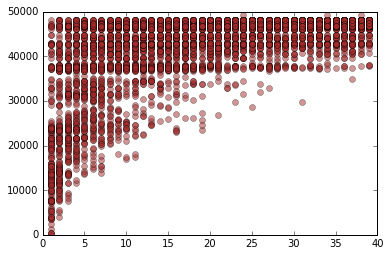

In [15]:
axes = plt.gca()
axes.set_xlim([0,50])
axes.set_ylim([0,70000])
for i, df in enumerate(all_dfs):
	# df['time_bins'] = pd.cut(df['time'], 100) 
	plt.plot(df['iters'], df['score'], "o", color=colors[i], alpha=0.5, label=names[i])
	# plt.hist(df['perf'], bins=20, color=colors[i], alpha=0.5, label=names[i])
	# df.groupby('time_bins')['score'].mean().plot()
	plt.show()

# plt.legend(numpoints=1)
# 
# plt.show()

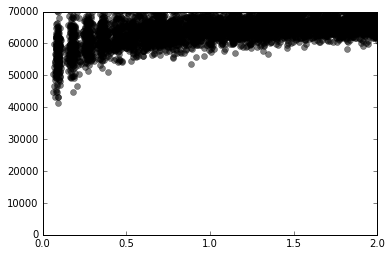

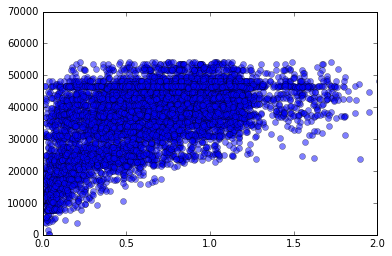

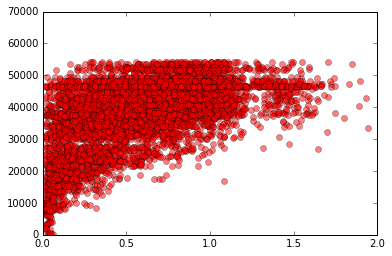

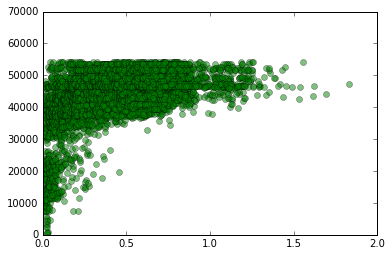

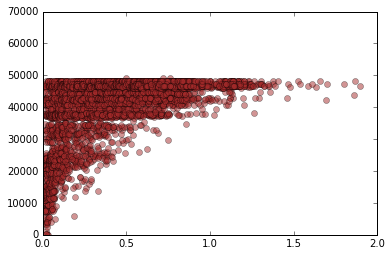

In [16]:
for i, df in enumerate(all_dfs):
	axes = plt.gca()
	axes.set_xlim([0,2])
	axes.set_ylim([0,70000])
	df['time_bins'] = pd.cut(df['time'], 100) 
	plt.plot(df['time'], df['score'], "o", color=colors[i], alpha=0.5, label=names[i])
	# plt.hist(df['perf'], bins=20, color=colors[i], alpha=0.5, label=names[i])
	# df.groupby('time_bins')['score'].mean().plot()
	plt.show()

# plt.legend(numpoints=1)
# 
# plt.show()

/usr/lib/python2.7/dist-packages/numpy/ma/core.py:4139: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


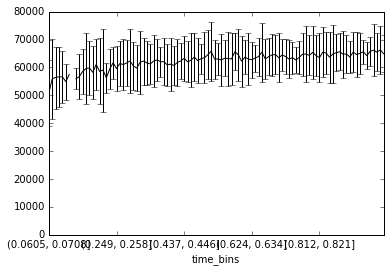

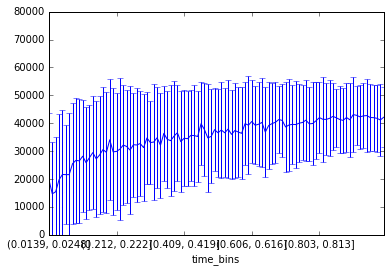

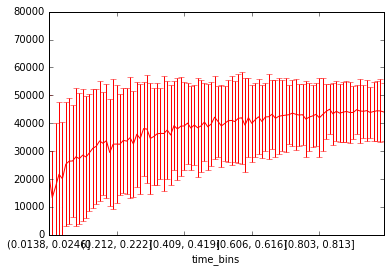

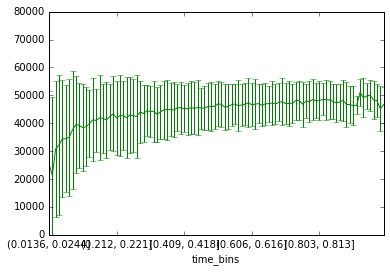

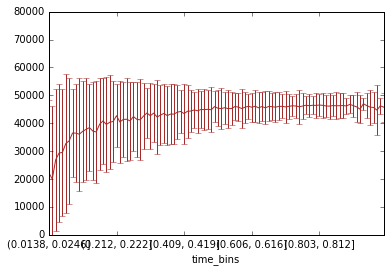

In [27]:
# fig = plt.figure(figsize=(16,10))
# res = reactive.groupby('iters')['score'].mean()
# res.plot()
# plt.show()

for i, df in enumerate(all_dfs):
	# fig.add_subplot(2,3,i+1)
	axes = plt.gca()
	# axes.set_xlim([0,2])
	axes.set_ylim([0,80000])
	df.loc[:,:] = df[df['time'] <= 1]
	df['time_bins'] = pd.cut(df['time'], 100)
	# df.groupby('iters')['score'].mean().plot(color=colors[i])
	std = df.groupby('time_bins')['score'].std()
	df.groupby('time_bins')['score'].mean().plot(yerr=2*std, color=colors[i])
	# plt.errorbar(m.index, m, xerr=0.5, yerr=2*std, linestyle='', ecolor=colors[i])
	plt.show()

# fixed[fixed['time'] > 4]
# pd.cut(stoch['time'], 4, precision=8, retbins=True)

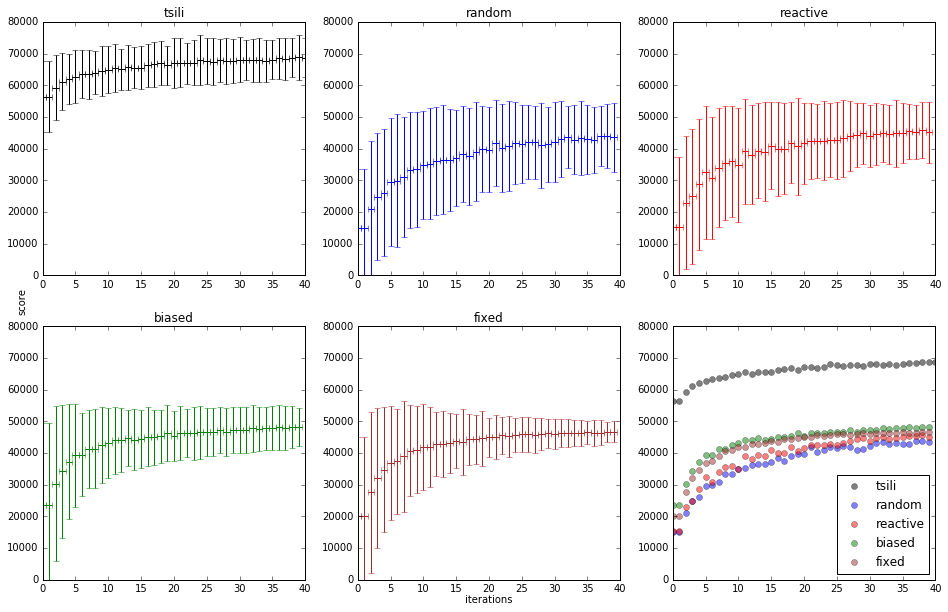

In [4]:
fig = plt.figure(figsize=(16,10))
# axes = plt.gca()
# fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey=True)
ax = fig.add_subplot(111)
ax.set_xlabel('iterations')
ax.set_ylabel('score')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.tick_params(axis='x', pad=10)
ax.tick_params(axis='y', pad=10)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
# ax.axis('off')


for i, df in enumerate(all_dfs):
	axes = fig.add_subplot(2,3,i+1)
	axes.set_xlim([0,40])
	axes.set_ylim([0,80000])
	axes.set_title(r'{}'.format(names[i]))
	# axes.set_xlable('iters')
	# axes.set_ylable('score')
	m = df.groupby('iters')['score'].mean()
	m[0.0] = m[1.0]
	std = df.groupby('iters')['score'].std()
	std = std.fillna(method='pad')
	std[0.0] = std[1.0]
	axes.errorbar(m.index, m, xerr=0.5, yerr=2*std, linestyle='', ecolor=colors[i])

axes = fig.add_subplot(2,3,6)
axes.set_xlim([0,40])
axes.set_ylim([0,80000])
# axes.set_xlable('iters')
# axes.set_ylable('score')
for i, df in enumerate(all_dfs):
	m = df.groupby('iters')['score'].mean()
	m[0.0] = m[1.0]
	axes.plot(m.index, m, "o", color=colors[i], alpha=0.5, label=names[i])
	# axes.errorbar(m.index, m, xerr=0.5, yerr=0, linestyle='', ecolor=colors[i])
axes.legend(loc="lower right", numpoints=1)

plt.show()
fig.savefig('iters.png')

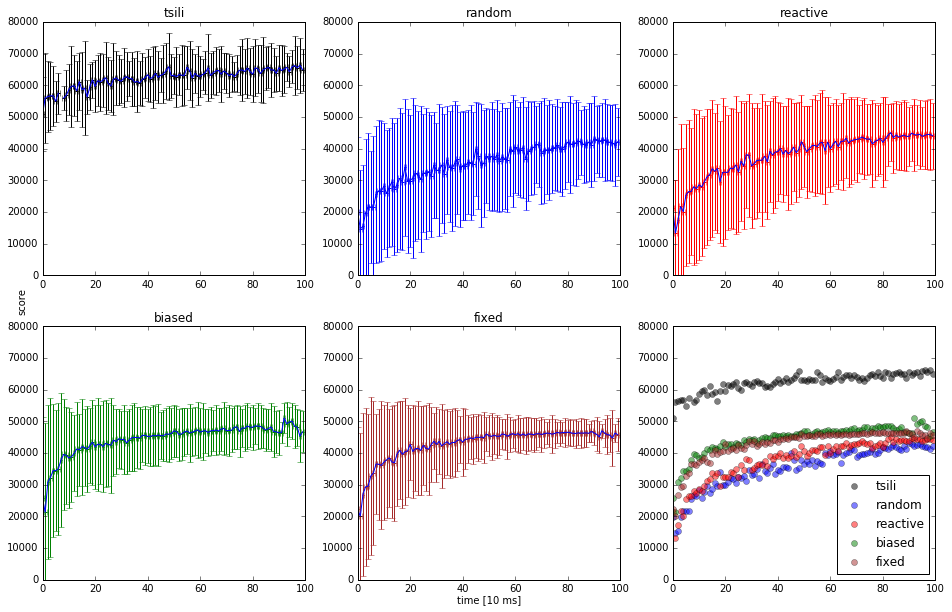

In [28]:
fig = plt.figure(figsize=(16,10))
# axes = plt.gca()
# fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey=True)
ax = fig.add_subplot(111)
ax.set_xlabel('time [10 ms]')
ax.set_ylabel('score')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.tick_params(axis='x', pad=10)
ax.tick_params(axis='y', pad=10)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)

for i, df in enumerate(all_dfs):
	axes = fig.add_subplot(2,3,i+1)
	axes.set_xlim([0,100])
	axes.set_ylim([0,80000])
	axes.set_title(r'{}'.format(names[i]))
	df['time_bins'], bins = pd.cut(df['time'], 100, retbins=True)
	m = df.groupby('time_bins')['score'].mean()
	std = df.groupby('time_bins')['score'].std()
	std = std.fillna(method='pad')
	axes.errorbar(range(len(m)), m, xerr=0.5, yerr=2*std, ecolor=colors[i])
	
axes = fig.add_subplot(2,3,6)
axes.set_xlim([0,100])
axes.set_ylim([0,80000])
# axes.set_xlable('iters')
# axes.set_ylable('score')
for i, df in enumerate(all_dfs):
	df['time_bins'], bins = pd.cut(df['time'], 100, retbins=True)
	m = df.groupby('time_bins')['score'].mean()
	# m[0.0] = m[1.0]
	axes.plot(range(len(m)), m, "o", color=colors[i], alpha=0.5, label=names[i])
	# axes.errorbar(m.index, m, xerr=0.5, yerr=0, linestyle='', ecolor=colors[i])
axes.legend(loc="lower right", numpoints=1)

plt.show()
fig.savefig('time_bins.png')

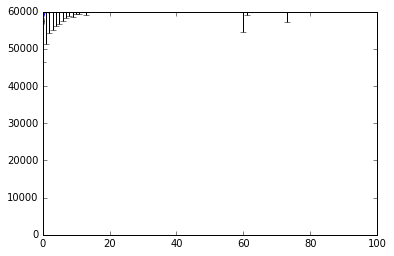

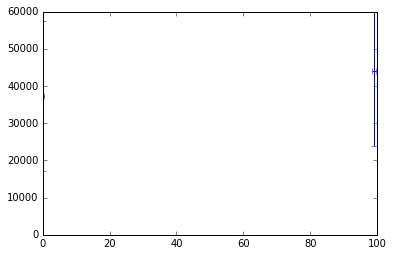

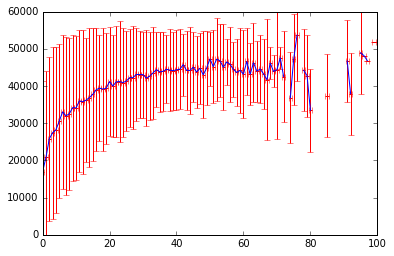

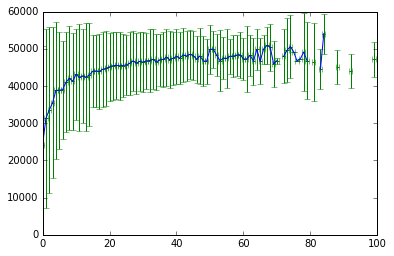

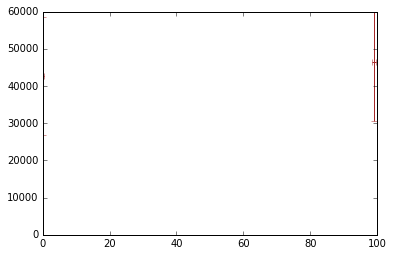

In [22]:
for i, df in enumerate(all_dfs):
	axes = plt.gca()
	axes.set_xlim([0,100])
	axes.set_ylim([0,60000])
	df['time_bins'], bins = pd.cut(df['time'], 100, retbins=True)
	m = df.groupby('time_bins')['score'].mean()
	std = df.groupby('time_bins')['score'].std()
	std = std.fillna(method='pad')
	plt.errorbar(range(len(m)), m, xerr=0.5, yerr=2*std, ecolor=colors[i])
	plt.show()

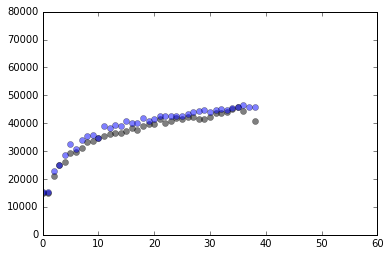

In [31]:
axes = plt.gca()
axes.set_xlim([0,60])
axes.set_ylim([0,80000])
for i, df in enumerate([stoch, reactive]):
	m = df.groupby('iters')['score'].mean()
	m[0.0] = m[1.0]
	axes.plot(m.index, m, "o", color=colors[i], alpha=0.5, label=names[i])
	# axes.errorbar(m.index, m, xerr=0.5, yerr=0, linestyle='', ecolor=colors[i])

plt.show()

In [36]:
print
print("Score")
print("Name \t Mean \t \t Median \t \t Variance")
for i, df in enumerate(all_dfs):
	print("{} & {:.2f} & {:.2f} & {:.2f} \\\\".format(names[i], df['score'].mean(),
	                                    df['score'].median(), df['score'].var()))
	
print
print("Time / Iteration")
print("Name \t Mean \t \t Median \t \t Variance")
for i, l in enumerate(all_dfs):
	print("{} & {:.2e} $s$ & {:.2e} $s$ & {:.2e} $s^2$ \\\\".format(names[i], (df['time']/df['iters']).mean(),
	                (df['time']/df['iters']).median(), (df['time']/df['iters']).var()))


Score
Name 	 Mean 	 	 Median 	 	 Variance
tsili & 62398.81 & 62584.48 & 24382079.95 \\
random & 36026.21 & 37869.43 & 110548051.17 \\
reactive & 38518.62 & 40811.82 & 105156604.74 \\
biased & 43930.06 & 46387.21 & 58669582.34 \\
fixed & 42488.18 & 46454.43 & 64570171.53 \\

Time / Iteration
Name 	 Mean 	 	 Median 	 	 Variance
tsili & 2.40e-02 $s$ & 2.24e-02 $s$ & 5.83e-05 $s^2$ \\
random & 2.40e-02 $s$ & 2.24e-02 $s$ & 5.83e-05 $s^2$ \\
reactive & 2.40e-02 $s$ & 2.24e-02 $s$ & 5.83e-05 $s^2$ \\
biased & 2.40e-02 $s$ & 2.24e-02 $s$ & 5.83e-05 $s^2$ \\
fixed & 2.40e-02 $s$ & 2.24e-02 $s$ & 5.83e-05 $s^2$ \\
